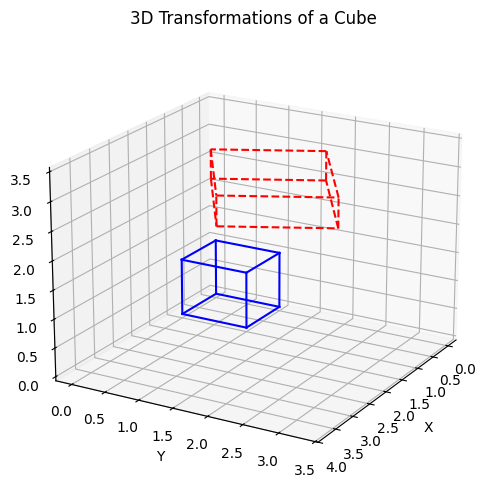

In [2]:
#Lab Tasks:
# simple python code:Transforming a cube
import numpy as np
import matplotlib .pyplot as plt
from mpl_toolkits .mplot3d import Axes3D 
def make_unit_cube ():
     pts = np.array ([
         [0, 0, 0, 1],
         [1, 0, 0, 1],
         [1, 1, 0, 1],
         [0, 1, 0, 1],
         [0, 0, 1, 1],
         [1, 0, 1, 1],
         [1, 1, 1, 1],
         [0, 1, 1, 1],
     ]).T
     return pts
def plot_cube (ax , pts , style='b-'):
    edges = [
        (0, 1), (1, 2), (2, 3), (3, 0),
        (4, 5), (5, 6), (6, 7), (7, 4),
        (0, 4), (1, 5), (2, 6), (3, 7)
    ]
    xs , ys , zs = pts [0], pts [1], pts [2]
    for i, j in edges:
        ax.plot(
            [xs[i], xs[j]],
            [ys[i], ys[j]],
            [zs[i], zs[j]],
            style
        )
def transform_points (pts , M):
    return M @ pts
def example_3d_transform ():
     cube = make_unit_cube ()
     S = np.array ([
         [2, 0, 0, 0],
         [0, 1.5, 0, 0],
         [0, 0, 0.5, 0],
         [0, 0, 0, 1]
     ])
     T = np.array ([
         [1, 0, 0, 2],
         [0, 1, 0, 1],
         [0, 0, 1, 3],
         [0, 0, 0, 1]
     ])
     theta = np.pi / 6
     Rz = np.array ([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta), np.cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
     ])
     M = T @ Rz @ S
     cube_t = transform_points (cube , M)
     fig = plt.figure(figsize =(8, 6))
     ax = fig. add_subplot (111 , projection ='3d')
     plot_cube (ax , cube , style='b-')
     plot_cube (ax , cube_t , style='r--')
     ax. set_title ("3D Transformations of a Cube")
     ax. set_xlabel ("X")
     ax. set_ylabel ("Y")
     ax. set_zlabel ("Z")
     ax. view_init (elev =20, azim =30)
     plt.show ()
example_3d_transform ()

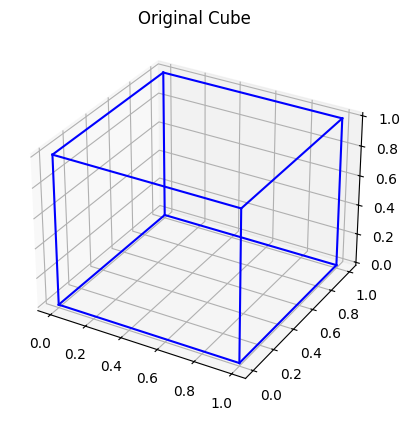

In [4]:
#1. Construct a cube and draw it using matplotlib.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Cube vertices
cube_vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

# Cube edges
edges = [
    (0,1),(1,2),(2,3),(3,0),
    (4,5),(5,6),(6,7),(7,4),
    (0,4),(1,5),(2,6),(3,7)
]

def draw_cube(ax, vertices, color='b'):
    for e in edges:
        p1 = vertices[e[0]]
        p2 = vertices[e[1]]
        ax.plot3D(*zip(p1, p2), color=color)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
draw_cube(ax, cube_vertices)
ax.set_title("Original Cube")
plt.show()

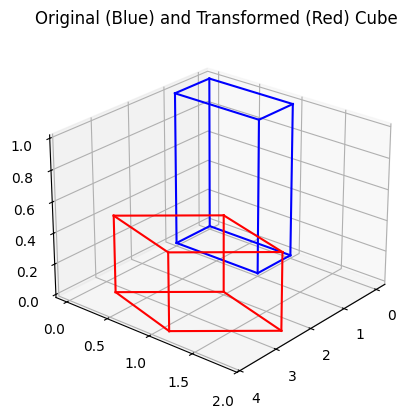

In [5]:
#2. Apply scaling, rotation and translation, and display both original and transformed cubes.
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# Cube vertices
cube = np.array([
    [0,0,0], [1,0,0], [1,1,0], [0,1,0],
    [0,0,1], [1,0,1], [1,1,1], [0,1,1]
])

# Cube edges
edges = [
    (0,1),(1,2),(2,3),(3,0),
    (4,5),(5,6),(6,7),(7,4),
    (0,4),(1,5),(2,6),(3,7)
]

# Function to draw cube

def draw_cube(ax, V, color='b'):
    for e in edges:
        p1 = V[e[0]]
        p2 = V[e[1]]
        ax.plot3D(*zip(p1, p2), color=color)

# Transformation Matrices

def scale_matrix(sx, sy, sz):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, sz]
    ])

def rotate_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])

# Apply transformations

S = scale_matrix(1.5, 1, 0.5)     # scaling
R = rotate_z(np.pi/6)             # rotation (30 degrees)
T = np.array([2, 1, 0])           # translation

scaled = cube @ S                 # scale
rotated = scaled @ R              # rotate
transformed = rotated + T         # translate (final)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

draw_cube(ax, cube, 'blue')          # original cube
draw_cube(ax, transformed, 'red')    # transformed cube

ax.set_title("Original (Blue) and Transformed (Red) Cube")
ax.view_init(25, 40)

plt.show()

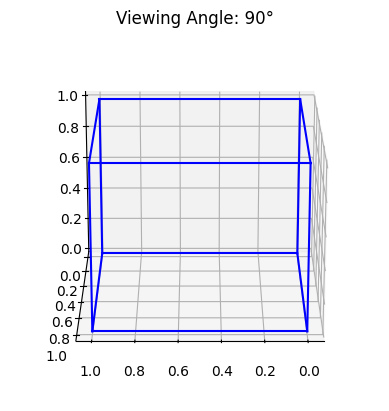

In [8]:
#3. Try different viewing angles using ax.view_init() and observe the projection.
for angle in range(90, 120, 45):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    draw_cube(ax, cube_vertices)
    ax.view_init(elev=20, azim=angle)
    ax.set_title(f"Viewing Angle: {angle}°")
    plt.show()

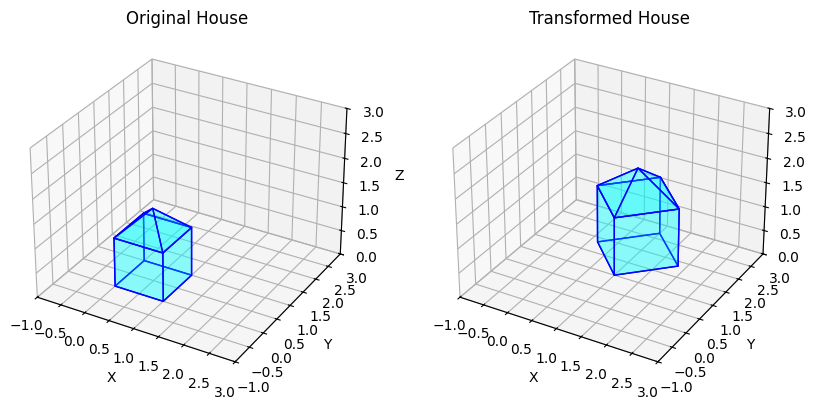

In [12]:
#Lab Assignment:
#1. Create a simple 3D house model (cube plus pyramid roof) and apply transformations.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def get_house_vertices():
    # Cube vertices (base)
    cube = np.array([[0,0,0], [1,0,0], [1,1,0], [0,1,0],
                     [0,0,1], [1,0,1], [1,1,1], [0,1,1]])
    # Pyramid vertices (roof) - top point at (0.5, 0.5, 1.5)
    roof_top = np.array([0.5, 0.5, 1.5])
    return cube, roof_top

def apply_transformations(vertices, roof_top, scale=1, tx=0, ty=0, tz=0, angle_z=0):
    # Scaling
    v = vertices * scale
    rt = roof_top * scale
    
    # Rotation (Z-axis example)
    theta = np.radians(angle_z)
    c, s = np.cos(theta), np.sin(theta)
    Rz = np.array([[c, -s, 0], [s, c, 0], [0, 0, 1]])
    v = v @ Rz.T
    rt = rt @ Rz.T
    
    # Translation
    v += [tx, ty, tz]
    rt += [tx, ty, tz]
    return v, rt

def plot_house(ax, v, rt, title="3D House"):
    # Define the 6 faces of the cube and 4 faces of the pyramid
    faces = [[v[0],v[1],v[2],v[3]], [v[4],v[5],v[6],v[7]], [v[0],v[1],v[5],v[4]],
             [v[2],v[3],v[7],v[6]], [v[1],v[2],v[6],v[5]], [v[4],v[7],v[3],v[0]],
             [v[4],v[5],rt], [v[5],v[6],rt], [v[6],v[7],rt], [v[7],v[4],rt]]
    
    ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='b', alpha=.25))
    ax.set_title(title)
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    ax.set_xlim(-1, 3); ax.set_ylim(-1, 3); ax.set_zlim(0, 3)

fig = plt.figure(figsize=(10, 5))
cube, roof = get_house_vertices()

# Original House
ax1 = fig.add_subplot(121, projection='3d')
plot_house(ax1, cube, roof, "Original House")

# Transformed House (Scaled, Rotated, Translated)
v_t, rt_t = apply_transformations(cube, roof, scale=1.2, tx=1, ty=1, angle_z=45)
ax2 = fig.add_subplot(122, projection='3d')
plot_house(ax2, v_t, rt_t, "Transformed House")

plt.show()

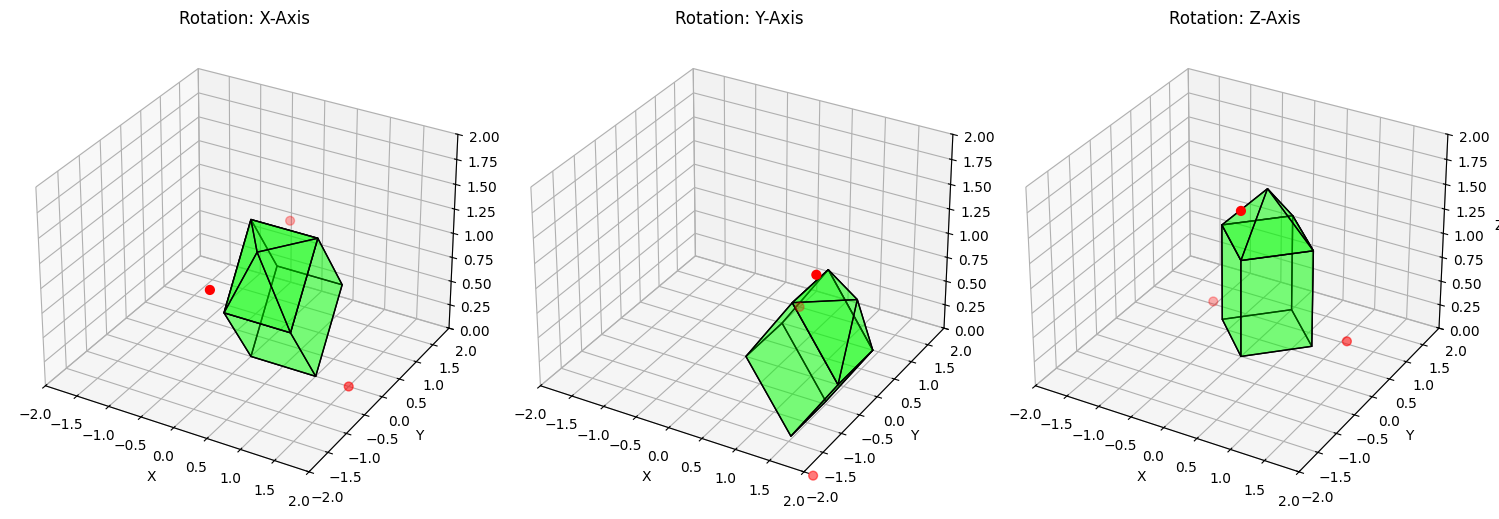

In [ ]:
#2. Implement rotations about the X-axis and Y-axis and compare their effects with rotation about the Z-axis.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
def get_house_and_axis_points():
    cube_v = np.array([[0,0,0], [1,0,0], [1,1,0], [0,1,0],
                       [0,0,1], [1,0,1], [1,1,1], [0,1,1]])
    roof_v = np.array([0.5, 0.5, 1.5])
    # Markers on X, Y, and Z axes to see rotation clearly
    markers = np.array([[1.5, 0, 0], [0, 1.5, 0], [0, 0, 1.5]])
    return cube_v, roof_v, markers

def rotate(vertices, roof, markers, axis='z', angle=45):
    rad = np.radians(angle)
    c, s = np.cos(rad), np.sin(rad)
    if axis == 'x':   R = np.array([[1,0,0], [0,c,-s], [0,s,c]])
    elif axis == 'y': R = np.array([[c,0,s], [0,1,0], [-s,0,c]])
    else:             R = np.array([[c,-s,0], [s,c,0], [0,0,1]])
    return vertices @ R.T, roof @ R.T, markers @ R.T

def plot_task(ax, v, rt, m, title):
    # Defining the 10 faces of the house (6 cube + 4 pyramid)
    f = [[v[0],v[1],v[2],v[3]], [v[4],v[5],v[6],v[7]], [v[0],v[1],v[5],v[4]],
         [v[2],v[3],v[7],v[6]], [v[1],v[2],v[6],v[5]], [v[4],v[7],v[3],v[0]],
         [v[4],v[5],rt], [v[5],v[6],rt], [v[6],v[7],rt], [v[7],v[4],rt]]
    
    ax.add_collection3d(Poly3DCollection(f, facecolors='lime', edgecolors='black', alpha=0.3))
    ax.scatter(m[:,0], m[:,1], m[:,2], color='red', s=40) # Axis markers
    ax.set_title(title)
    ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(0, 2)
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

# Execution
fig = plt.figure(figsize=(15, 5))
v, rt, m = get_house_and_axis_points()

for i, ax_type in enumerate(['x', 'y', 'z']):
    plot_ax = fig.add_subplot(131 + i, projection='3d')
    v_r, rt_r, m_r = rotate(v, rt, m, axis=ax_type, angle=45)
    plot_task(plot_ax, v_r, rt_r, m_r, f"Rotation: {ax_type.upper()}-Axis")

plt.tight_layout()
plt.show() 